# Kinematics and Workspace of a 2-Link Planar Manipulator Using Python
## Based on Sympy (Symbolic Python) Mechanics

### Prerequisites

Technical side: Know-how of robot kinemaics is recommened, but not necessary. For advanced usage, e.g. to extend this example to more complex designs, knwoeldge of DH (classic) notation is required. If you don't feel confident about that, don't worry! You should be able to learn this key concept in robotics through interactive playing here.

Programing side: Beginner to intermediate level skills with Python and Jupyter Notebooks would be handy. The python libraries we will use are:

* Sympy (for symbolic computation)
* Numpy (for numerical computaion)
* Plotly (for 3D interactive plotting)


In [13]:
# !pip install sympy

In [2]:
import sympy as sp

In [3]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

## 2-Link Planar (2RP) Manipulator

The Jupyter notebook can use IPython to display rich content. Here, We will use the Image function to import the geometric represnttion of 2-link manipulator example.

In [7]:
from IPython.display import Image
Image('fig/2rp_new.png', width=300)

In [9]:
from sympy.physics.mechanics import dynamicsymbols, Point, ReferenceFrame

In [6]:
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')
theta1, theta2, l1, l2, theta, alpha, a, d 

(theta1, theta2, l1, l2, theta, alpha, a, d)

## Kinematics using Sympy Mechanics
In first step, we define the kinematic relationships among rigid bodies of the 2-link manipulator shown above. We will make use of Sympy's ReferenceFrame objects to describe the four frames, define their orientations, and then construct vectors in the frames that position various important Points. Our objective is to analytically calculate the tip position in XY (Cartesian) space.

### Reference Frames Assigment
To start with, we define three reference frames, one each for the base, shoulder joint, elbow joint and the hand. These reference frames hold the information that defines how each frame is translted and/or oriented relative to each other. We start by creating four reference frames for each frame in the system. Here, base frame acts as the inertial frame of reference.


## Homogenous Transformation¶

In [10]:
base_frame = ReferenceFrame('B')
shoulder_frame = ReferenceFrame('S')
elbow_frame = ReferenceFrame('E')
hand_frame = ReferenceFrame('H')

### Frame Orientation Definition
Now we need to specify how the frames are oriented with respect to each other. To do this, we define the two generalized coordinates,  θ1(t)  and  θ2(t) , for the shoulder joint and elbow joint angles which are time varying quantities. As these joints are held at distance by rigid links, we use  l1  and  l2  to repesent the distance each frame from its previous successive farme.

We start by setting the orientation of the base frame as the inertial reference frame. Then the shoulder frame orients equal to  theta1  along the z-axis of base frame. And, we keep on defining the next frames orientation according to the physical mechanics of the 2-link manipulator.

In [11]:
shoulder_frame.orient(base_frame, 'Axis', [theta1, base_frame.z])
elbow_frame.orient(shoulder_frame, 'Axis', [theta2, shoulder_frame.z])
hand_frame.orient(elbow_frame, 'Axis', [0, elbow_frame.z])


# Forward Kinematic Equations

### Homogeneous Transformation

To obtain the transformation matrix from base frame to hand frame, we use Sympy's direction cosine matrix method.

In [12]:
T02 = base_frame.dcm(hand_frame)
T02.simplify()

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), 0],
[sin(theta1 + theta2),  cos(theta1 + theta2), 0],
[                   0,                     0, 1]])

### Rigid Body Points and Locations
To derive the forward kinematic equations, we need to defin the the length of each rigid body. We will first define points that locate the joints: base, shoulder, elbow and hand.

In [13]:
base = Point('O')
shoulder = Point('0')
elbow = Point('1')
hand = Point('2')

Next we set the position with the Point.set_pos() method, giving the reference point and the vector.

In [14]:
shoulder.set_pos(base, 0 * base_frame.x)
elbow.set_pos(shoulder, l1 * shoulder_frame.x)
hand.set_pos(elbow, l2 * elbow_frame.x)

Base to Hand Position

In [15]:
pxy = (hand.pos_from(base).express(base_frame)).simplify()
pxy

(l1*cos(theta1) + l2*cos(theta1 + theta2))*B.x + (l1*sin(theta1) + l2*sin(theta1 + theta2))*B.y

Position in x-direction

In [16]:
px = l1*sp.cos(theta1) + l2*sp.cos(theta1 + theta2)
px

l1*cos(theta1) + l2*cos(theta1 + theta2)

Position in y-direction

In [17]:
py = l1*sp.sin(theta1) + l2*sp.sin(theta1 + theta2)
py

l1*sin(theta1) + l2*sin(theta1 + theta2)

## Tip Position Evaluation 

To evaluate tip position numerically, we make use of Sympy's lambdify function which takes  l1 ,  l2 ,  θ1  and  θ2  as arguments.

In [19]:
fx = sp.lambdify((l1, l2, theta1, theta2), px, 'numpy')
fy = sp.lambdify((l1, l2, theta1, theta2), py, 'numpy')

To plot tip position in X and Y, we import Matplotlib and Numpy. For inline plot display, we use Ipython magic.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

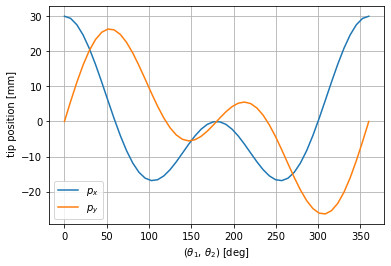

In [21]:
theta1s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(360)) # desired range of motion for joint 2

zx = np.array(fx(15.0, 15.0, theta1s, theta2s))
zy = np.array(fy(15.0, 15.0, theta1s, theta2s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

## Manipulator Workspace
The next step is to visualize the workspce of our manipulator. For this purpose, we will import Plotly and make sure that it displays inline plot in our notebook environment.

In [34]:
# !pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use

import plotly.offline as py
import plotly.graph_objs as go
from numpy import * # Not recommended, but we use to avoid rewriting the forward kinematic equations with prefix 'np'

In [35]:
theta11 = np.linspace(d2r(0),d2r(90))
theta22 = np.linspace(d2r(0), d2r(360))
theta1, theta2 = np.meshgrid(theta11, theta22)
l_range = [5] # we can use more than one value here

px1 = {}
py1 = {}
pz1 = {}
for i in l_range:
    l1 = i
    l2 = i - 4
    
    pxa = l1*cos(theta1) + l2*cos(theta1 + theta2)
    pya = l1*sin(theta1) + l2*sin(theta1 + theta2)
    
    px1['x{0}'.format(i)] = pxa
    py1['x{0}'.format(i)] = pya

In [36]:
pxx = px1['x5']
pyy = py1['x5']
pzz = pyy*0 #dummy zero points for z-axis, as it doesn't exist

In [37]:
trace1 = go.Surface(z=pzz, x=pyy, y=pxx,
                    colorscale='Reds', 
                    showscale=False, 
                    opacity=0.7,
                   )
data = [trace1]

In [38]:
layout = go.Layout(scene = dict(
                    xaxis = dict(title='X (mm)'),
                    yaxis = dict(title='Y (mm)'),
                    zaxis = dict(title='Z (mm)'),
                    ),
                  )

In [39]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Use mouse to explore the workspace plot.         Wheel: Zoom in/out, Left: Rotate, Right: Pan

To summarize, we analytically derived the kinematics of 2-link manipulator using DH notation and visualized its tip position and workspace.